# 📊 Redução de Dimensionalidade no MNIST

## 🎯 Objetivo
Reduzir as 784 features (28x28 pixels) do dataset MNIST para apenas **2 características principais**:

- **Intensidade**  
- **Simetria (vertical + horizontal)**

Essa redução permite trabalhar com modelos de Aprendizado de Máquina mais simples, sem perder informações relevantes para distinguir os dígitos.

---

## 🖼️ Intensidade

A **intensidade** mede a quantidade de pixels escuros na imagem.  
É calculada pela soma dos valores dos pixels dividida por 255:

$$
I = \frac{\sum_{i=0}^{27} \sum_{j=0}^{27} pix_{i,j}}{255}
$$

Quanto maior o valor, mais preenchida a imagem (ex.: dígito 0 tende a ter intensidade maior que o dígito 1).

---

## 🔍 Simetria

A **simetria** é calculada comparando a imagem com sua reflexão.

### Simetria Vertical (Sv)
Compara pixels da metade esquerda com os da metade direita, linha a linha:

$$
S_v = \frac{\sum_{i=0}^{27} \sum_{j=0}^{13} \left| pix_{i,j} - pix_{i,27-j} \right|}{255}
$$

### Simetria Horizontal (Sh)
Compara pixels da metade superior com os da metade inferior, coluna a coluna:

$$
S_h = \frac{\sum_{i=0}^{13} \sum_{j=0}^{27} \left| pix_{i,j} - pix_{27-i,j} \right|}{255}
$$

### Simetria Total
$$
S = S_v + S_h
$$

- **Quanto mais próximo de 0, mais simétrica a imagem.**
- Valores maiores indicam maior assimetria.

---

## 📂 Construção dos Novos Arquivos

Foram gerados novos arquivos CSV contendo apenas as 3 colunas relevantes:

- **label** → o dígito real  
- **intensidade** → nível de preenchimento da imagem  
- **simetria** → medida de quão simétrica é a imagem  

```python
reduzir_dataset('mnist_train.csv', 'train_redu.csv')
reduzir_dataset('mnist_test.csv', 'test_redu.csv')


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df_train = pd.read_csv('dataset/train.csv')

df_test = pd.read_csv('dataset/test.csv')

In [4]:
df_train

label;pixel0;pixel1;pixel2;pixel3;pixel4;pixel5;pixel6;pixel7;pixel8;pixel9;pixel10;pixel11;pixel12;pixel13;pixel14;pixel15;pixel16;pixel17;pixel18;pixel19;pixel20;pixel21;pixel22;pixel23;pixel24;pixel25;pixel26;pixel27;pixel28;pixel29;pixel30;pixel31;pixel32;pixel33;pixel34;pixel35;pixel36;pixel37;pixel38;pixel39;pixel40;pixel41;pixel42;pixel43;pixel44;pixel45;pixel46;pixel47;pixel48;pixel49;pixel50;pixel51;pixel52;pixel53;pixel54;pixel55;pixel56;pixel57;pixel58;pixel59;pixel60;pixel61;pixel62;pixel63;pixel64;pixel65;pixel66;pixel67;pixel68;pixel69;pixel70;pixel71;pixel72;pixel73;pixel74;pixel75;pixel76;pixel77;pixel78;pixel79;pixel80;pixel81;pixel82;pixel83;pixel84;pixel85;pixel86;pixel87;pixel88;pixel89;pixel90;pixel91;pixel92;pixel93;pixel94;pixel95;pixel96;pixel97;pixel98;pixel99;pixel100;pixel101;pixel102;pixel103;pixel104;pixel105;pixel106;pixel107;pixel108;pixel109;pixel110;pixel111;pixel112;pixel113;pixel114;pixel115;pixel116;pixel117;pixel118;pixel119;pixel120;pixel121;pixel122;pixel123;pixel124;pixel125;pixel126;pixel127;pixel128;pixel129;pixel130;pixel131;pixel132;pixel133;pixel134;pixel135;pixel136;pixel137;pixel138;pixel139;pixel140;pixel141;pixel142;pixel143;pixel144;pixel145;pixel146;pixel147;pixel148;pixel149;pixel150;pixel151;pixel152;pixel153;pixel154;pixel155;pixel156;pixel157;pixel158;pixel159;pixel160;pixel161;pixel162;pixel163;pixel164;pixel165;pixel166;pixel167;pixel168;pixel169;pixel170;pixel171;pixel172;pixel173;pixel174;pixel175;pixel176;pixel177;pixel178;pixel179;pixel180;pixel181;pixel182;pixel183;pixel184;pixel185;pixel186;pixel187;pixel188;pixel189;pixel190;pixel191;pixel192;pixel193;pixel194;pixel195;pixel196;pixel197;pixel198;pixel199;pixel200;pixel201;pixel202;pixel203;pixel204;pixel205;pixel206;pixel207;pixel208;pixel209;pixel210;pixel211;pixel212;pixel213;pixel214;pixel215;pixel216;pixel217;pixel218;pixel219;pixel220;pixel221;pixel222;pixel223;pixel224;pixel225;pixel226;pixel227;pixel228;pixel229;pixel230;pixel231;pixel232;pixel233;pixel234;pixel235;pixel236;pixel237;pixel238;pixel239;pixel240;pixel241;pixel242;pixel243;pixel244;pixel245;pixel246;pixel247;pixel248;pixel249;pixel250;pixel251;pixel252;pixel253;pixel254;pixel255;pixel256;pixel257;pixel258;pixel259;pixel260;pixel261;pixel262;pixel263;pixel264;pixel265;pixel266;pixel267;pixel268;pixel269;pixel270;pixel271;pixel272;pixel273;pixel274;pixel275;pixel276;pixel277;pixel278;pixel279;pixel280;pixel281;pixel282;pixel283;pixel284;pixel285;pixel286;pixel287;pixel288;pixel289;pixel290;pixel291;pixel292;pixel293;pixel294;pixel295;pixel296;pixel297;pixel298;pixel299;pixel300;pixel301;pixel302;pixel303;pixel304;pixel305;pixel306;pixel307;pixel308;pixel309;pixel310;pixel311;pixel312;pixel313;pixel314;pixel315;pixel316;pixel317;pixel318;pixel319;pixel320;pixel321;pixel322;pixel323;pixel324;pixel325;pixel326;pixel327;pixel328;pixel329;pixel330;pixel331;pixel332;pixel333;pixel334;pixel335;pixel336;pixel337;pixel338;pixel339;pixel340;pixel341;pixel342;pixel343;pixel344;pixel345;pixel346;pixel347;pixel348;pixel349;pixel350;pixel351;pixel352;pixel353;pixel354;pixel355;pixel356;pixel357;pixel358;pixel359;pixel360;pixel361;pixel362;pixel363;pixel364;pixel365;pixel366;pixel367;pixel368;pixel369;pixel370;pixel371;pixel372;pixel373;pixel374;pixel375;pixel376;pixel377;pixel378;pixel379;pixel380;pixel381;pixel382;pixel383;pixel384;pixel385;pixel386;pixel387;pixel388;pixel389;pixel390;pixel391;pixel392;pixel393;pixel394;pixel395;pixel396;pixel397;pixel398;pixel399;pixel400;pixel401;pixel402;pixel403;pixel404;pixel405;pixel406;pixel407;pixel408;pixel409;pixel410;pixel411;pixel412;pixel413;pixel414;pixel415;pixel416;pixel417;pixel418;pixel419;pixel420;pixel421;pixel422;pixel423;pixel424;pixel425;pixel426;pixel427;pixel428;pixel429;pixel430;pixel431;pixel432;pixel433;pixel434;pixel435;pixel436;pixel437;pixel438;pixel439;pixel440;pixel441;pixel442;pixel443;pixel444;pixel445;pixel446;pixel447;pixel448;pixel449;pixel450;pixel451;pixel452;pixel453;pixel454;pixel455;

In [5]:

df_test

label;pixel0;pixel1;pixel2;pixel3;pixel4;pixel5;pixel6;pixel7;pixel8;pixel9;pixel10;pixel11;pixel12;pixel13;pixel14;pixel15;pixel16;pixel17;pixel18;pixel19;pixel20;pixel21;pixel22;pixel23;pixel24;pixel25;pixel26;pixel27;pixel28;pixel29;pixel30;pixel31;pixel32;pixel33;pixel34;pixel35;pixel36;pixel37;pixel38;pixel39;pixel40;pixel41;pixel42;pixel43;pixel44;pixel45;pixel46;pixel47;pixel48;pixel49;pixel50;pixel51;pixel52;pixel53;pixel54;pixel55;pixel56;pixel57;pixel58;pixel59;pixel60;pixel61;pixel62;pixel63;pixel64;pixel65;pixel66;pixel67;pixel68;pixel69;pixel70;pixel71;pixel72;pixel73;pixel74;pixel75;pixel76;pixel77;pixel78;pixel79;pixel80;pixel81;pixel82;pixel83;pixel84;pixel85;pixel86;pixel87;pixel88;pixel89;pixel90;pixel91;pixel92;pixel93;pixel94;pixel95;pixel96;pixel97;pixel98;pixel99;pixel100;pixel101;pixel102;pixel103;pixel104;pixel105;pixel106;pixel107;pixel108;pixel109;pixel110;pixel111;pixel112;pixel113;pixel114;pixel115;pixel116;pixel117;pixel118;pixel119;pixel120;pixel121;pixel122;pixel123;pixel124;pixel125;pixel126;pixel127;pixel128;pixel129;pixel130;pixel131;pixel132;pixel133;pixel134;pixel135;pixel136;pixel137;pixel138;pixel139;pixel140;pixel141;pixel142;pixel143;pixel144;pixel145;pixel146;pixel147;pixel148;pixel149;pixel150;pixel151;pixel152;pixel153;pixel154;pixel155;pixel156;pixel157;pixel158;pixel159;pixel160;pixel161;pixel162;pixel163;pixel164;pixel165;pixel166;pixel167;pixel168;pixel169;pixel170;pixel171;pixel172;pixel173;pixel174;pixel175;pixel176;pixel177;pixel178;pixel179;pixel180;pixel181;pixel182;pixel183;pixel184;pixel185;pixel186;pixel187;pixel188;pixel189;pixel190;pixel191;pixel192;pixel193;pixel194;pixel195;pixel196;pixel197;pixel198;pixel199;pixel200;pixel201;pixel202;pixel203;pixel204;pixel205;pixel206;pixel207;pixel208;pixel209;pixel210;pixel211;pixel212;pixel213;pixel214;pixel215;pixel216;pixel217;pixel218;pixel219;pixel220;pixel221;pixel222;pixel223;pixel224;pixel225;pixel226;pixel227;pixel228;pixel229;pixel230;pixel231;pixel232;pixel233;pixel234;pixel235;pixel236;pixel237;pixel238;pixel239;pixel240;pixel241;pixel242;pixel243;pixel244;pixel245;pixel246;pixel247;pixel248;pixel249;pixel250;pixel251;pixel252;pixel253;pixel254;pixel255;pixel256;pixel257;pixel258;pixel259;pixel260;pixel261;pixel262;pixel263;pixel264;pixel265;pixel266;pixel267;pixel268;pixel269;pixel270;pixel271;pixel272;pixel273;pixel274;pixel275;pixel276;pixel277;pixel278;pixel279;pixel280;pixel281;pixel282;pixel283;pixel284;pixel285;pixel286;pixel287;pixel288;pixel289;pixel290;pixel291;pixel292;pixel293;pixel294;pixel295;pixel296;pixel297;pixel298;pixel299;pixel300;pixel301;pixel302;pixel303;pixel304;pixel305;pixel306;pixel307;pixel308;pixel309;pixel310;pixel311;pixel312;pixel313;pixel314;pixel315;pixel316;pixel317;pixel318;pixel319;pixel320;pixel321;pixel322;pixel323;pixel324;pixel325;pixel326;pixel327;pixel328;pixel329;pixel330;pixel331;pixel332;pixel333;pixel334;pixel335;pixel336;pixel337;pixel338;pixel339;pixel340;pixel341;pixel342;pixel343;pixel344;pixel345;pixel346;pixel347;pixel348;pixel349;pixel350;pixel351;pixel352;pixel353;pixel354;pixel355;pixel356;pixel357;pixel358;pixel359;pixel360;pixel361;pixel362;pixel363;pixel364;pixel365;pixel366;pixel367;pixel368;pixel369;pixel370;pixel371;pixel372;pixel373;pixel374;pixel375;pixel376;pixel377;pixel378;pixel379;pixel380;pixel381;pixel382;pixel383;pixel384;pixel385;pixel386;pixel387;pixel388;pixel389;pixel390;pixel391;pixel392;pixel393;pixel394;pixel395;pixel396;pixel397;pixel398;pixel399;pixel400;pixel401;pixel402;pixel403;pixel404;pixel405;pixel406;pixel407;pixel408;pixel409;pixel410;pixel411;pixel412;pixel413;pixel414;pixel415;pixel416;pixel417;pixel418;pixel419;pixel420;pixel421;pixel422;pixel423;pixel424;pixel425;pixel426;pixel427;pixel428;pixel429;pixel430;pixel431;pixel432;pixel433;pixel434;pixel435;pixel436;pixel437;pixel438;pixel439;pixel440;pixel441;pixel442;pixel443;pixel444;pixel445;pixel446;pixel447;pixel448;pixel449;pixel450;pixel451;pixel452;pixel453;pixel454;pixel455;

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2186 entries, 0 to 2185
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

### função para calcular intensidade e simetria de cada imagem

In [7]:
def calcular_intensidade_e_simetria(row):
    pixelx = row[1:].values.reshape(28, 28)

    intensidade = pixelx.sum() / 255
    simetria_vertical = np.sum(np.abs(pixelx[:, :14] - pixelx[:, ::-1][:, :14])) / 255
    simetria_horizontal = np.sum(np.abs(pixelx[:14, :] - pixelx[::-1, :][:14, :])) / 255
    simetria_completa = simetria_vertical + simetria_horizontal

    return pd.Series({'intensidade': intensidade, 'simetria': simetria_completa})



In [8]:
# Separando as colunas 

In [9]:
'''X = df_train.drop(columns=['label']).values
y = df_train['label'].values



print(X)

print("Valores de y:")
print(y)'''

'X = df_train.drop(columns=[\'label\']).values\ny = df_train[\'label\'].values\n\n\n\nprint(X)\n\nprint("Valores de y:")\nprint(y)'

In [10]:
def dados_reduzidos():
    TEST_DATA_PATH = ('dataset/test.csv')
    TRAIN_DATA_PATH = ('dataset/train.csv')
    data_test_df = pd.read_csv(TEST_DATA_PATH, sep=';')
    data_train_df = pd.read_csv(TRAIN_DATA_PATH, sep=';')

    data_train_df[['intensidade', 'simetria']] = data_train_df.apply(calcular_intensidade_e_simetria, axis=1)
    data_test_df[['intensidade', 'simetria']] = data_test_df.apply(calcular_intensidade_e_simetria, axis=1) 

    colunas_relevantes = ['label', 'intensidade', 'simetria']
    TEST_REDU_DATA_PATH = ('dataset/test_redu.csv')
    TRAIN_REDU_DATA_PATH = ('dataset/train_redu.csv')

    data_test_df[colunas_relevantes].to_csv('dataset/test_redu.csv', index=False)
    data_train_df[colunas_relevantes].to_csv('dataset/train_redu.csv', index=False)

    data_test_redu_df = pd.read_csv(TEST_REDU_DATA_PATH)
    data_train_redu_df = pd.read_csv(TRAIN_REDU_DATA_PATH)
    
    return {
        "data_test_redu_df": data_test_redu_df,
        "data_train_redu_df": data_train_redu_df
    }

In [11]:
datasets = dados_reduzidos()

data_test_redu_df = datasets['data_test_redu_df']
data_train_redu_df = datasets['data_train_redu_df']



In [12]:
data_test_redu_df

,label,intensidade,simetria
0,0,147.933333,130.470588
1,0,131.054902,122.721569
2,0,134.890196,151.725490
3,0,139.976471,133.921569
4,0,129.580392,130.274510
...,...,...,...
1110,5,96.121569,139.521569
1111,5,98.439216,130.729412
1112,5,95.141176,122.227451
1113,5,106.882353,128.007843


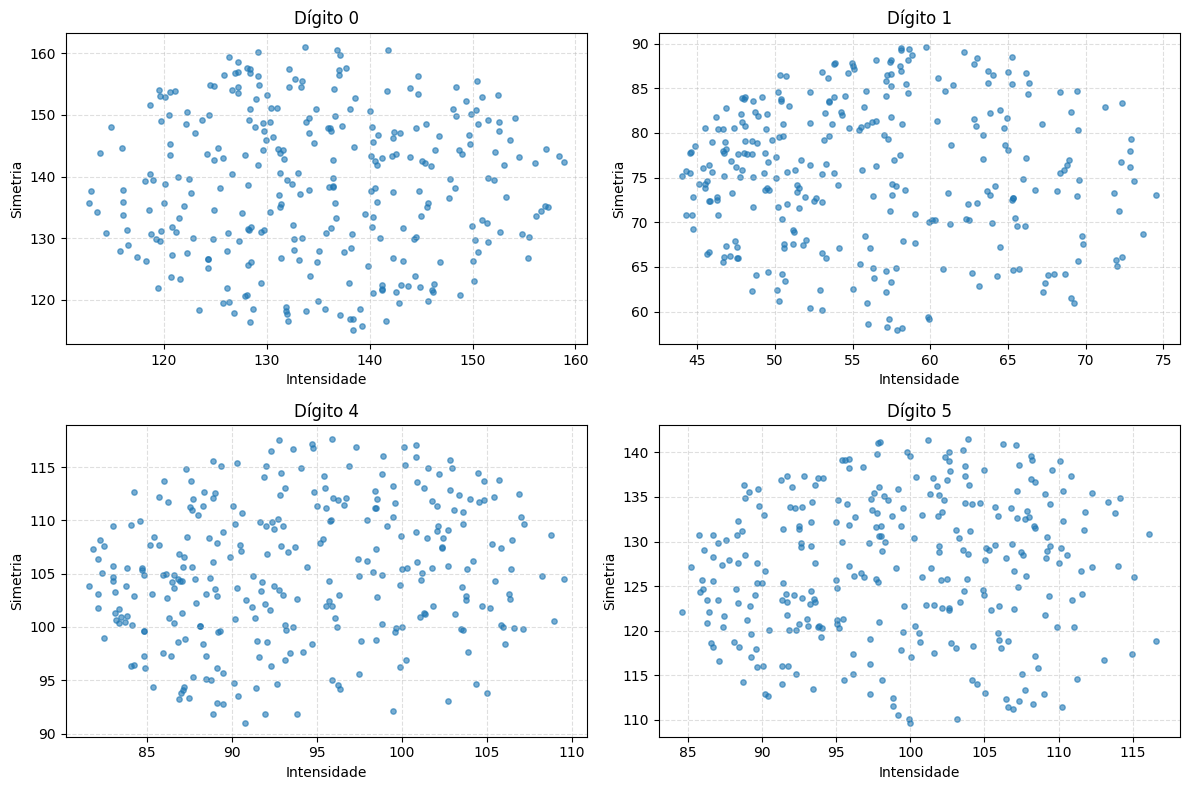

In [15]:
df = data_train_redu_df

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for digito, ax in zip(sorted(df['label'].unique()), axes):
    subset = df[df['label'] == digito].sample(min(300, len(df[df['label'] == digito])), random_state=42)
    
    ax.scatter(subset['intensidade'], subset['simetria'], 
               alpha=0.6, s=15, c="tab:blue")
    
    ax.set_title(f'Dígito {digito}')
    ax.set_xlabel('Intensidade')
    ax.set_ylabel('Simetria')
    ax.grid(True, linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()